# ENPM808W Project
Dataset: Spotify dataset 1921-2020 160k+ tracks

Kaggle link: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

Submitted by: Aditya Khopkar (UID:116911627), Grusha Mehrotra (UID:116907163),
Sukoon Sarin (UID: 116955522)

In [1]:
# Connecting this notebook with Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
# Importing required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Setting the path and reading the dataset
data = pd.read_csv(r'/content/drive/My Drive/Project Dataset/archive/data.csv')
data_by_artist = pd.read_csv('/content/drive/My Drive/Project Dataset/archive/data_by_artist.csv')
data_by_genres = pd.read_csv('/content/drive/My Drive/Project Dataset/archive/data_by_genres.csv')
data_by_year = pd.read_csv('/content/drive/My Drive/Project Dataset/archive/data_by_year.csv')
data_w_genres = pd.read_csv('/content/drive/My Drive/Project Dataset/archive/data_w_genres.csv')

In [4]:
# Finding out if my data object has the right kind of data in it
data.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [5]:
# Repeating the same for other files
data_by_artist.head(5)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9


In [6]:
# Repeating the same for other files
data_by_genres.head(5)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [7]:
# Repeating the same for other files
data_by_year.head(5)

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1
3,1924,0.935575,0.548654,188461.649789,0.347033,0.583955,0.237875,-14.202304,0.090210,120.653359,0.668574,0.603376,10,1
4,1925,0.965422,0.571890,184130.699620,0.264373,0.408893,0.243094,-14.516707,0.115457,115.671715,0.616430,2.707224,5,1


In [8]:
# Repeating the same for other files
data_w_genres.head(5)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


In [9]:
# Finding out the information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [10]:
# Finding out the information for other files
data_by_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           27621 non-null  object 
 1   acousticness      27621 non-null  float64
 2   danceability      27621 non-null  float64
 3   duration_ms       27621 non-null  float64
 4   energy            27621 non-null  float64
 5   instrumentalness  27621 non-null  float64
 6   liveness          27621 non-null  float64
 7   loudness          27621 non-null  float64
 8   speechiness       27621 non-null  float64
 9   tempo             27621 non-null  float64
 10  valence           27621 non-null  float64
 11  popularity        27621 non-null  float64
 12  key               27621 non-null  int64  
 13  mode              27621 non-null  int64  
 14  count             27621 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.2+ MB


In [11]:
# Finding out the information for other files
data_by_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2664 non-null   object 
 1   acousticness      2664 non-null   float64
 2   danceability      2664 non-null   float64
 3   duration_ms       2664 non-null   float64
 4   energy            2664 non-null   float64
 5   instrumentalness  2664 non-null   float64
 6   liveness          2664 non-null   float64
 7   loudness          2664 non-null   float64
 8   speechiness       2664 non-null   float64
 9   tempo             2664 non-null   float64
 10  valence           2664 non-null   float64
 11  popularity        2664 non-null   float64
 12  key               2664 non-null   int64  
 13  mode              2664 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 291.5+ KB


In [12]:
# Finding out the information for other files
data_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              100 non-null    int64  
 1   acousticness      100 non-null    float64
 2   danceability      100 non-null    float64
 3   duration_ms       100 non-null    float64
 4   energy            100 non-null    float64
 5   instrumentalness  100 non-null    float64
 6   liveness          100 non-null    float64
 7   loudness          100 non-null    float64
 8   speechiness       100 non-null    float64
 9   tempo             100 non-null    float64
 10  valence           100 non-null    float64
 11  popularity        100 non-null    float64
 12  key               100 non-null    int64  
 13  mode              100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [13]:
# Finding out the information for other files
data_w_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           27621 non-null  object 
 1   acousticness      27621 non-null  float64
 2   danceability      27621 non-null  float64
 3   duration_ms       27621 non-null  float64
 4   energy            27621 non-null  float64
 5   instrumentalness  27621 non-null  float64
 6   liveness          27621 non-null  float64
 7   loudness          27621 non-null  float64
 8   speechiness       27621 non-null  float64
 9   tempo             27621 non-null  float64
 10  valence           27621 non-null  float64
 11  popularity        27621 non-null  float64
 12  key               27621 non-null  int64  
 13  mode              27621 non-null  int64  
 14  count             27621 non-null  int64  
 15  genres            27621 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

In [14]:
# Looking for null values
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [15]:
# Looking for null values
data_by_artist.isnull().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

In [16]:
# Looking for null values
data_by_genres.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [17]:
# Looking for null values
data_by_year.isnull().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [18]:
# Looking for null values
data_w_genres.isnull().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
dtype: int64

In [19]:
# Finding number of rows and columns
data.shape

(169909, 19)

In [20]:
# Finding number of rows and columns
data_by_artist.shape

(27621, 15)

In [21]:
# Finding number of rows and columns
data_by_genres.shape

(2664, 14)

In [22]:
# Finding number of rows and columns
data_by_year.shape

(100, 14)

In [23]:
# Finding number of rows and columns
data_w_genres.shape

(27621, 16)

In [24]:
# Data profiling for the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,169909.0,0.493214,0.376627,0.0,0.0945,0.492000,0.8880,0.996
danceability,169909.0,0.538150,0.175346,0.0,0.4170,0.548000,0.6670,0.988
duration_ms,169909.0,231406.158973,121321.923219,5108.0,171040.0000,208600.000000,262960.0000,5403500.000
energy,169909.0,0.488593,0.267390,0.0,0.2630,0.481000,0.7100,1.000
explicit,169909.0,0.084863,0.278679,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,169909.0,0.161937,0.309329,0.0,0.0000,0.000204,0.0868,1.000
key,169909.0,5.200519,3.515257,0.0,2.0000,5.000000,8.0000,11.000
liveness,169909.0,0.206690,0.176796,0.0,0.0984,0.135000,0.2630,1.000
loudness,169909.0,-11.370289,5.666765,-60.0,-14.4700,-10.474000,-7.1180,3.855
mode,169909.0,0.708556,0.454429,0.0,0.0000,1.000000,1.0000,1.000


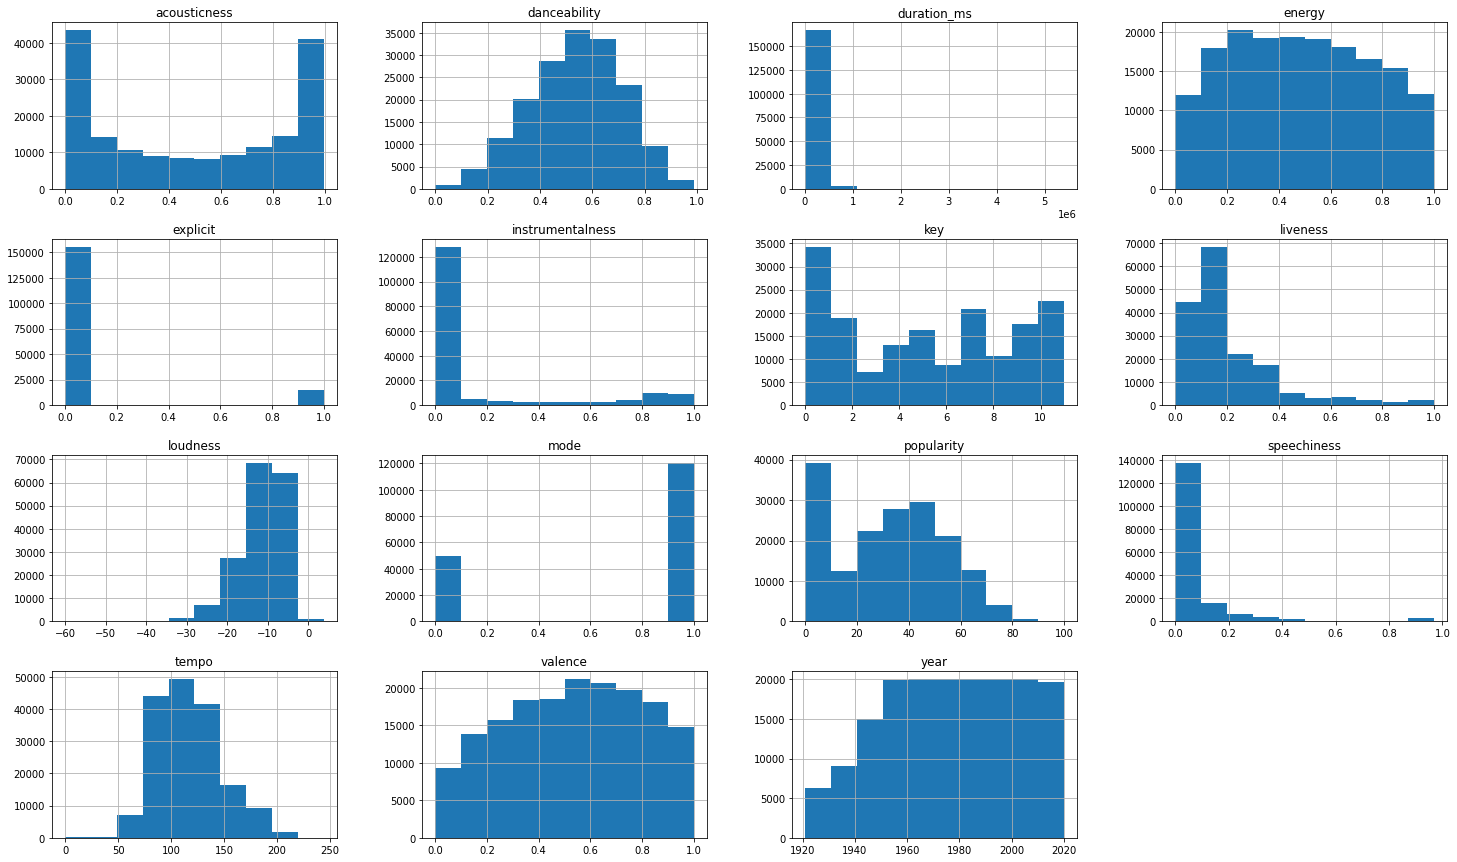

In [25]:
# Fig. 1: Looking at visual distribution of data overall
data.hist(figsize=(25, 15))
plt.title('Distribution of data overall')
plt.show()

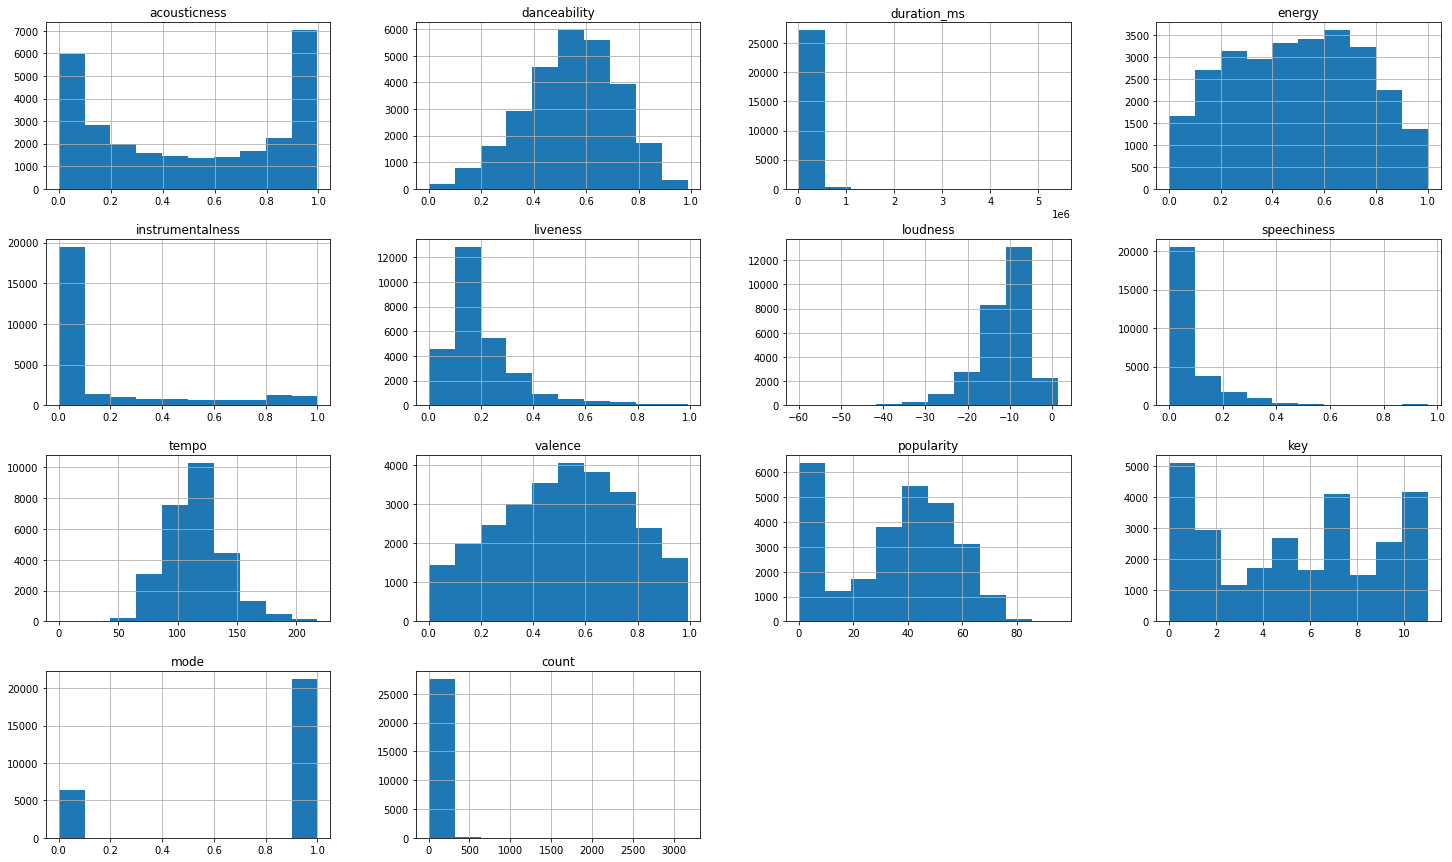

In [26]:
# Fig. 2: Looking at visual distribution of data by artists
data_by_artist.hist(figsize=(25, 15))
plt.title('Distribution of data by artists')
plt.show()

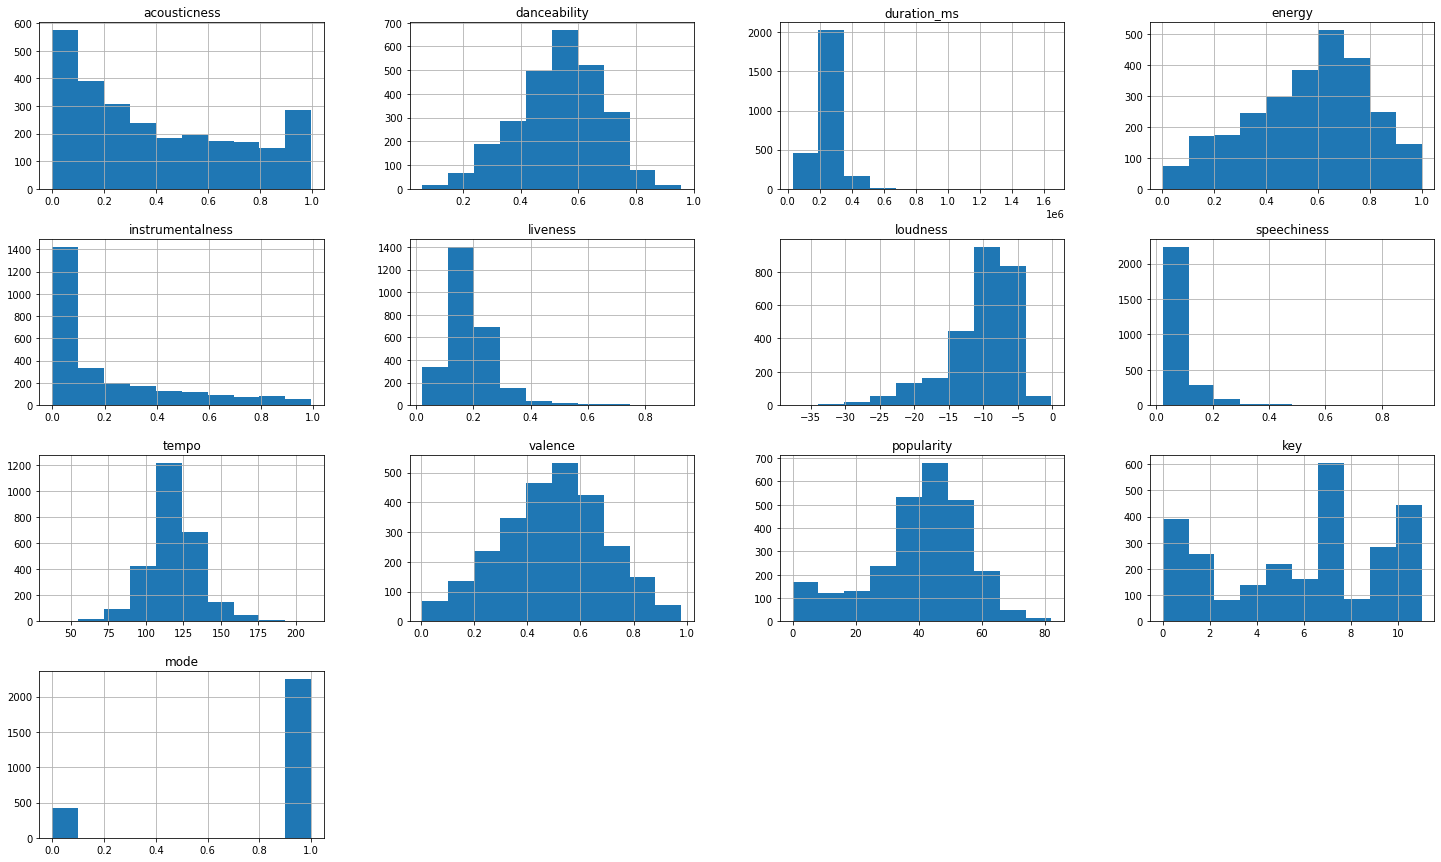

In [27]:
# Fig. 3: Looking at visual distribution of data by genres
data_by_genres.hist(figsize=(25, 15))
plt.title('Distribution of data by genres')
plt.show()

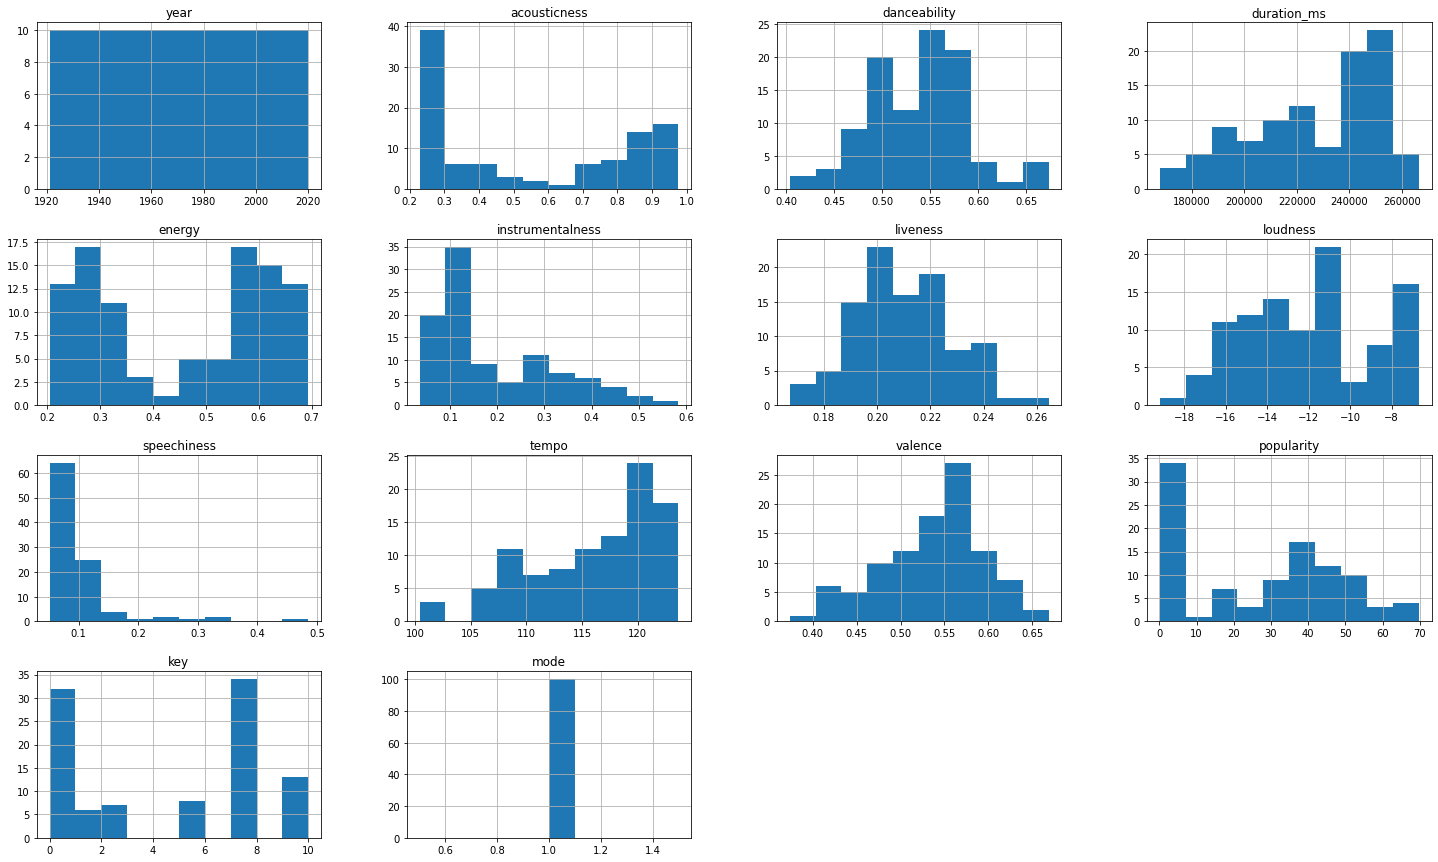

In [28]:
# Fig. 4: Looking at visual distribution of data
data_by_year.hist(figsize=(25, 15))
plt.title('Distribution of data by year', y = -1)
plt.show()

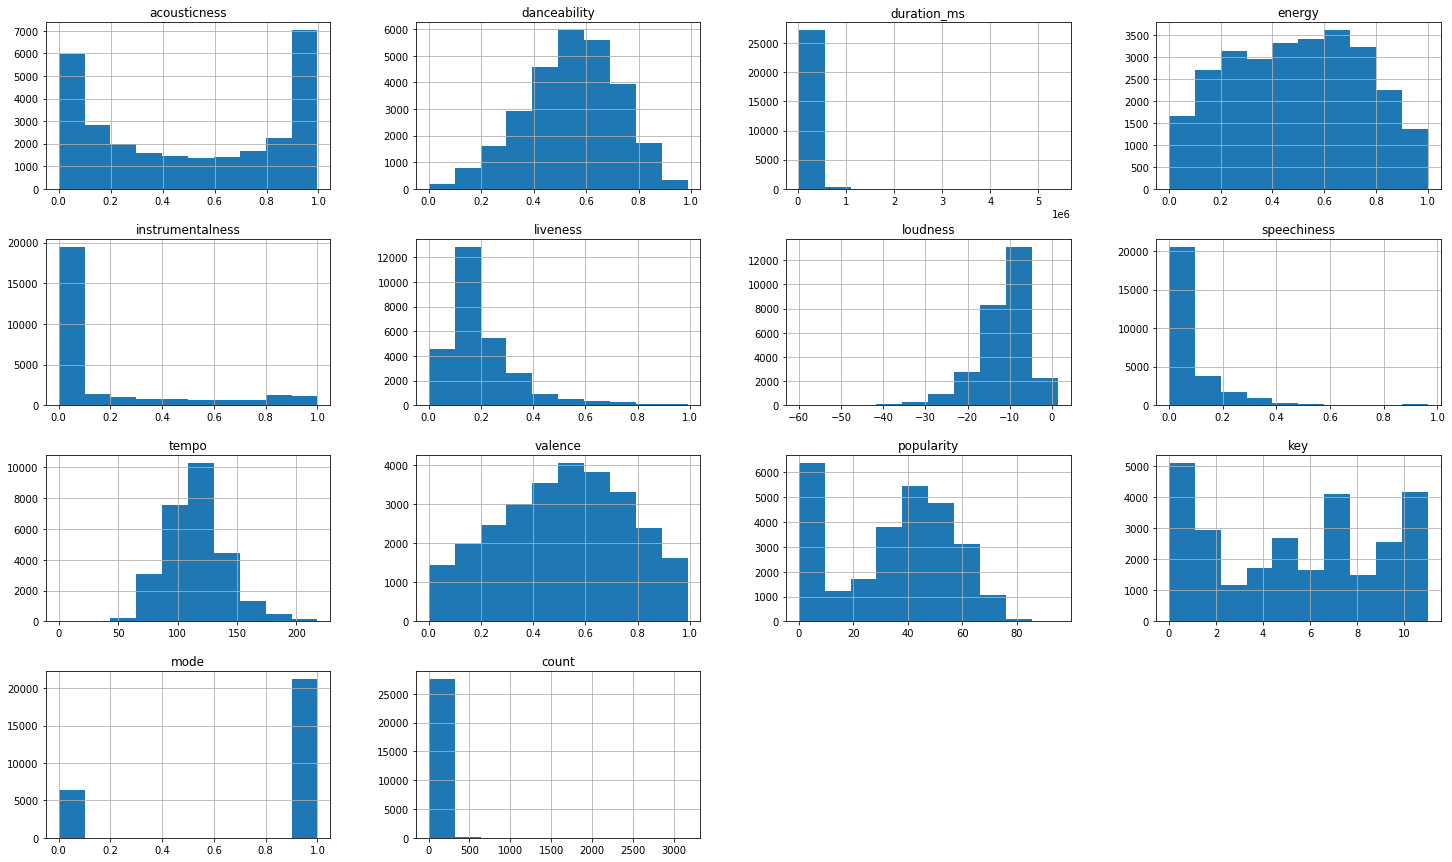

In [29]:
# Fig. 5 : Looking at visual distribution of data with genres
data_w_genres.hist(figsize=(25, 15))
plt.title('Distribution of data with genres')
plt.show()

In [30]:
# Finding names of all the unique artists
uniqueArtists=data.artists.unique().tolist()
print(uniqueArtists)

["['Carl Woitschach']", "['Robert Schumann', 'Vladimir Horowitz']", "['Seweryn Goszczyński']", "['Francisco Canaro']", "['Frédéric Chopin', 'Vladimir Horowitz']", "['Felix Mendelssohn', 'Vladimir Horowitz']", "['Franz Liszt', 'Vladimir Horowitz']", "['Francisco Canaro', 'Charlo']", "['Sergei Rachmaninoff', 'Vladimir Horowitz']", "['Samuel Barber', 'Vladimir Horowitz']", "['Ludwig van Beethoven', 'Staatskapelle Berlin', 'Richard Strauss']", "['George Butterworth', 'John Cameron']", "['Alexander Scriabin', 'Vladimir Horowitz']", "['Francisco Canaro', 'Luis Scalon']", "['Thomas Arne', 'John Heddle Nash']", "['Moritz Moszkowski', 'Vladimir Horowitz']", "['Roger Quilter', 'John Heddle Nash']", "['Hafız Yaşar']", "['Muzio Clementi', 'Vladimir Horowitz']", "['Ignacio Corsini']", "['Shungi Music Crew']", "['Perchicot']", "['Dmitry Kabalevsky', 'Vladimir Horowitz']", "['Paul Whiteman']", "['Ted Weems & His Orchestra']", "['Taj Mahal']", "['John Raitt']", "['Leroy Carr']", "['Hikmet Rıza Hanım']

In [31]:
# Finding Total Number of unique artists in our dataset
print(len(uniqueArtists))

33375


In [32]:
# Finding out top 10% popular songs
data[data["popularity"] > 90]["name"]

87440                                            Play Date
87540                                           goosebumps
87741                                              Falling
87742                                           SICKO MODE
87840                                              The Box
87842                                          Sunday Best
87843                                              ROXANNE
87844                                           Supalonely
87845                                               Say So
87847                                  HIGHEST IN THE ROOM
87850                                      Don't Start Now
87852                 ily (i love you baby) (feat. Emilee)
87856                                    Someone You Loved
87858                                         Dance Monkey
87863                                              bad guy
87865                                             Memories
87890                                          Breaking 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Tracks')

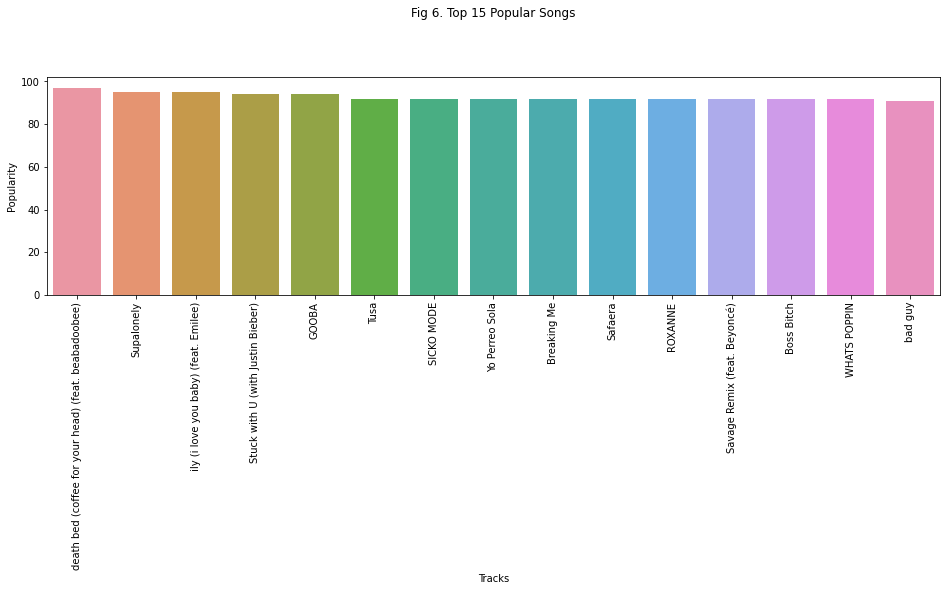

In [33]:
# Plotting popular songs
plt.figure(figsize=(16, 4))
plt.title('Fig 6. Top 15 Popular Songs', y = 1.25)
plt.xticks(rotation = 90)
x = data.groupby("name")["popularity"].mean().sort_values(ascending=False).head(15)
ax = sns.barplot(x.index, x)
ax.set_ylabel('Popularity')
ax.set_xlabel('Tracks')

In [34]:
# Finding out top 2% popular artists
data[data["popularity"] > 98]["artists"]

87940    ['DaBaby', 'Roddy Ricch']
87942               ['The Weeknd']
Name: artists, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Artists')

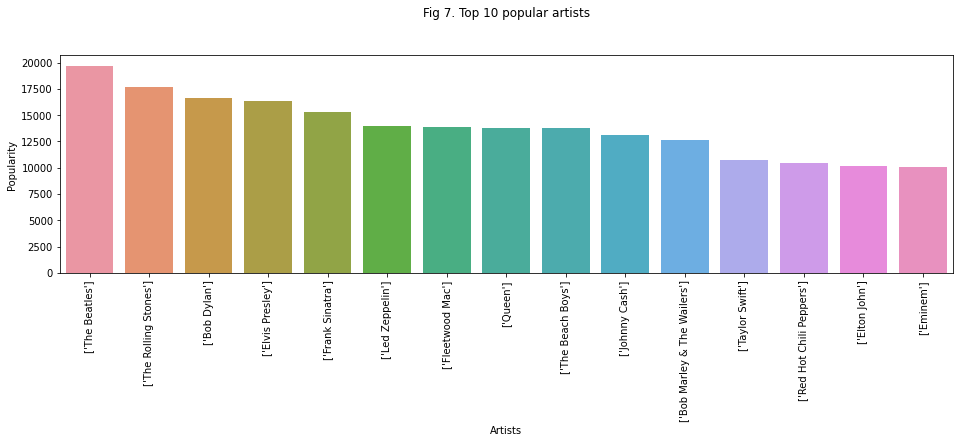

In [35]:
# Plotting top 10 popular artists
plt.figure(figsize=(16, 4))
plt.title('Fig 7. Top 10 popular artists', y = 1.15)
plt.xticks(rotation = 90)
x = data.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(15)
ax = sns.barplot(x.index, x)
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')

<Figure size 1152x1440 with 0 Axes>

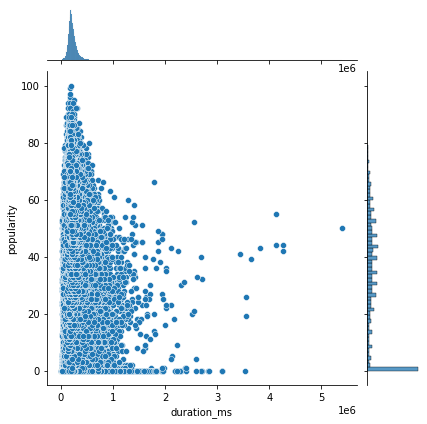

In [36]:
# Fig. 8: Plotting a graph between duration and popularity
plt.figure(figsize=(16, 20))
sns.jointplot(y=data.popularity,x=data["duration_ms"],data=data)

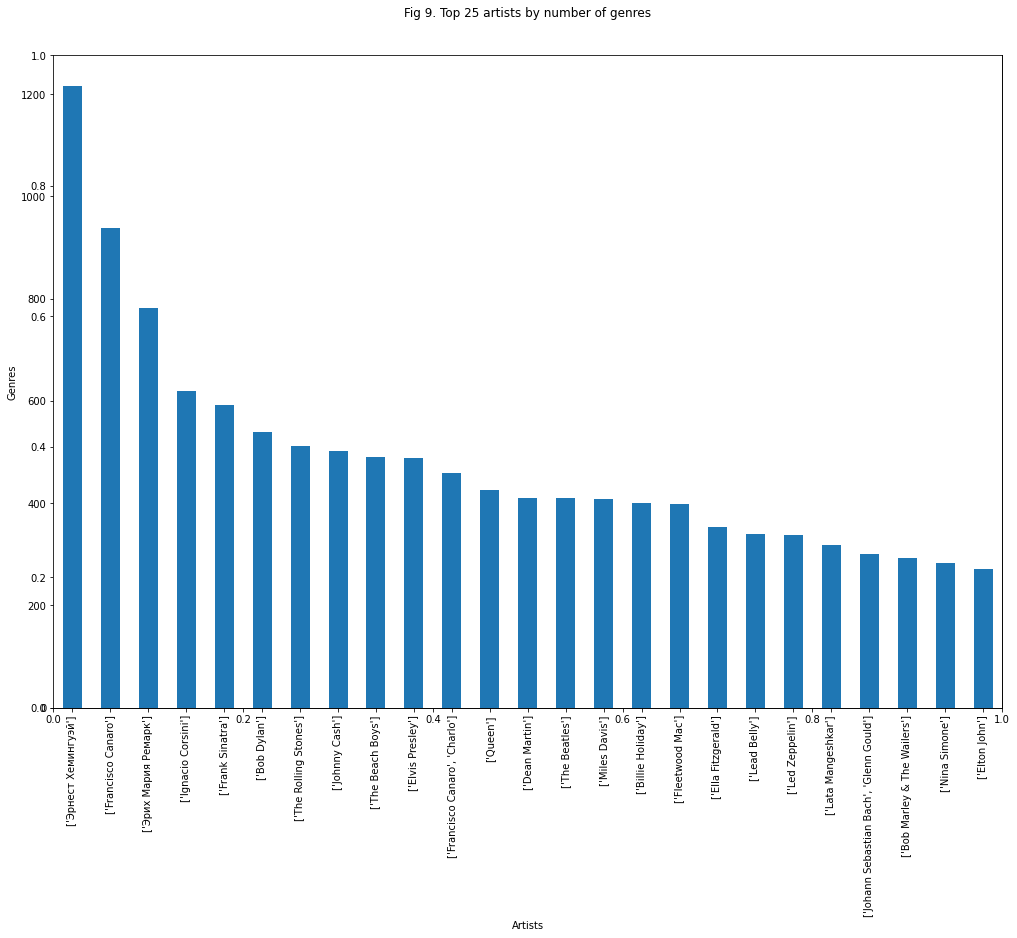

In [37]:
# Plotting for Top 25 artists having most number of genres
fig = plt.figure(figsize=(17, 12))
plt.title('Fig 9. Top 25 artists by number of genres', y = 1.05)
ax = fig.subplots()
ax.set_ylabel("Genres")
ax.set_xlabel("Artists")
data["artists"].value_counts()[:25].plot(ax=ax, kind="bar")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


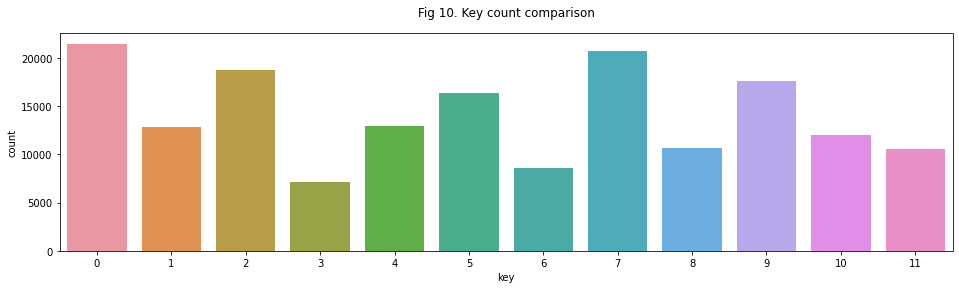

In [38]:
# Plotting a graph comparing Key
plt.figure(figsize=(16, 4))
plt.title('Fig 10. Key count comparison', y = 1.05)
plt.xlabel('key')
plt.ylabel('count')
sns.countplot(data['key'])
plt.show()

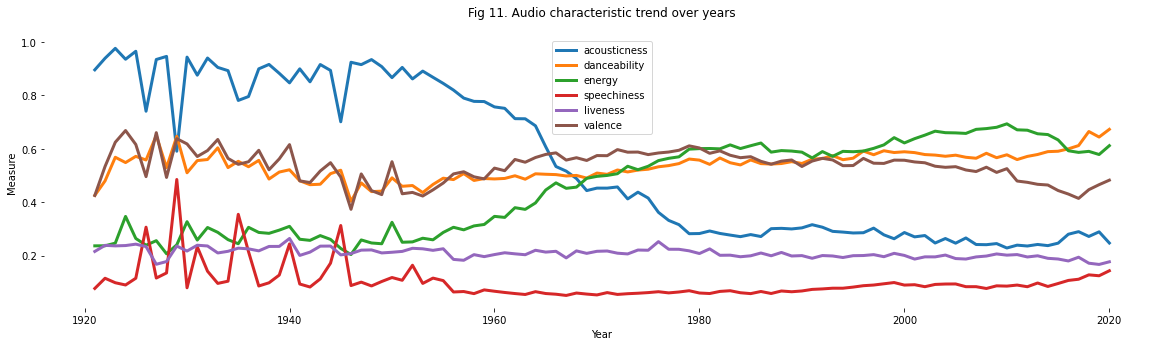

In [39]:
# Checking audio characteristics over years
fig,ax = plt.subplots(figsize=(20, 5))
sns.despine(fig, left=True, bottom=True)
sns.set_context(rc={"lines.linewidth": 3})

features = ["acousticness","danceability","energy","speechiness","liveness","valence"]
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
ax.set_title('Fig 11. Audio characteristic trend over years', y = 1.05)
for col in features:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)

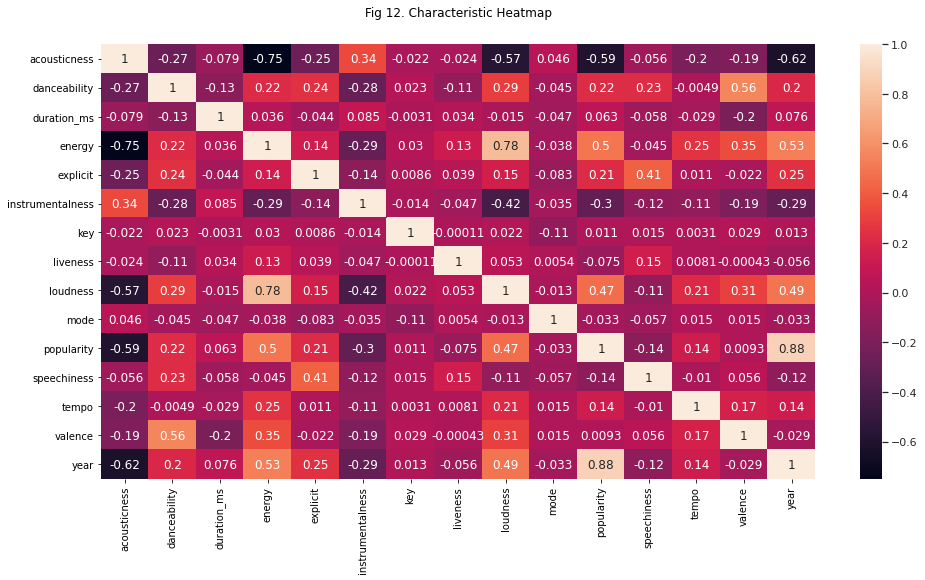

In [40]:
# Plotting a heatmap for the given data
plt.figure(figsize=(16, 8))
plt.title('Fig 12. Characteristic Heatmap', y = 1.05)
sns.set(style="white")
corelation = data.corr()
sns.heatmap(corelation, annot=True)

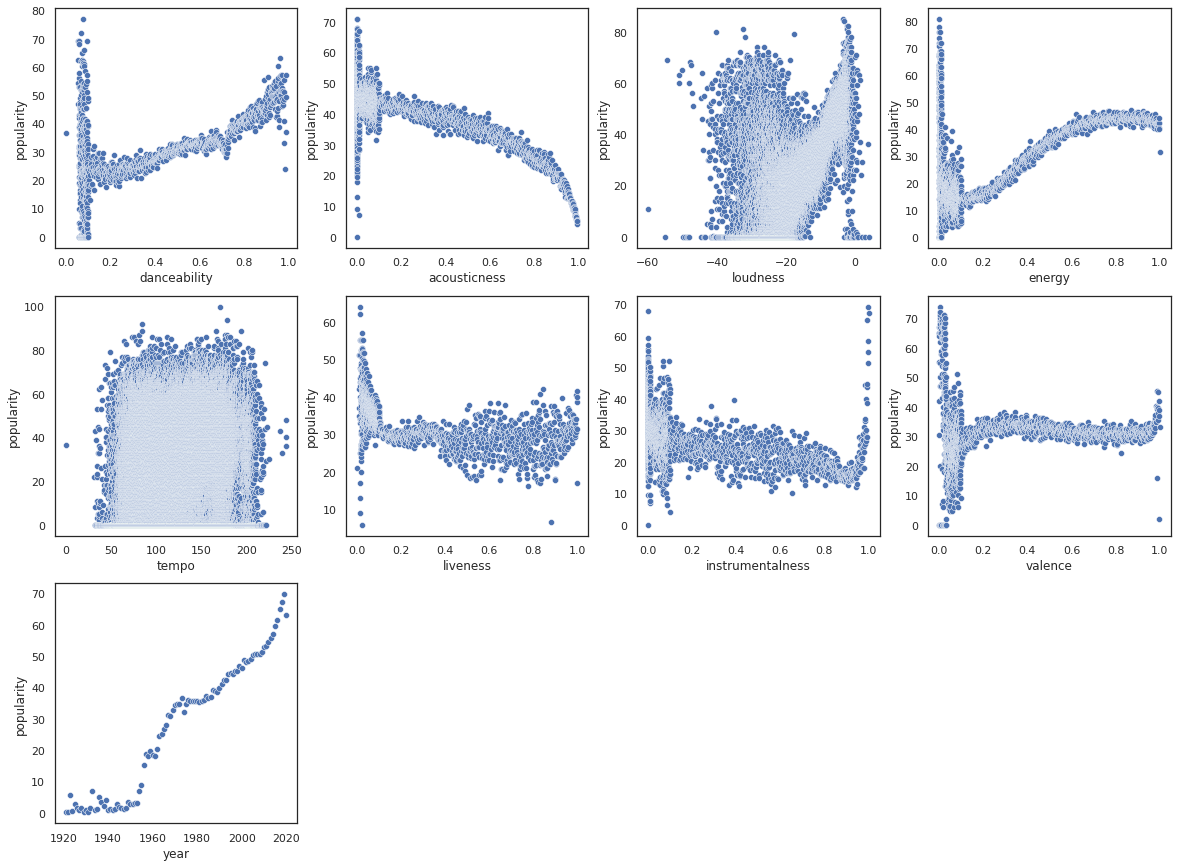

In [41]:
# Fig. 13: Plotting popularity with different features
plt.figure(figsize=(20, 15))
plt.title('Fig 13. Popularity trend over different features', y = 1.05)
Xfeatures = ["danceability", "acousticness", "loudness", "energy", "tempo", "liveness", "instrumentalness", "valence","year"] # Can add more features in this list
Yfeature = "popularity"
cols = 4
rows = len(Xfeatures)//cols + 1
for idx, feat in enumerate(Xfeatures):
  plt.subplot(rows,cols,idx+1)
  sub_group = data.groupby(feat)
  Yfeature = sub_group.mean()["popularity"] # Mean popularity is good enough to estimate and visualize
  sns.scatterplot(x=Yfeature.index, y=Yfeature)

### **Written explaination for the graph above**
1. Here, we observe the behaviour/relation of popularity with respect to various Key Performance Indicators. Out of these, it can be seen that Danceability and Year have a linear increasing trend in anticipation of popularity.
2. Low danceability high popularity - anomaly for its linear behaviour; It may be because, when there is low danceability, there might be other indexes which are higher, this results in strong zero bias for danceability index. This may affect our prediction model.
3. Parameters such as loudness, tempo have no "linear trend", and linear regression may not be efficient.
4. Should produce better results if two or more features are combined. We can see other possible parameters using Lasso and Ridge regression.

### **Future plan of action**
1. Defining KPIs.
2. Building and employing Prediction Model.
3. Conducting data clustering.
4. Verifying our results.

#PREDICTION MODEL

### Step 1
Finding appropriate Key Performance Indicators: Till now according to the popularity trend visualization, Danceability and Year show a linear increasing trend with popularity. We proceed with Lasso and Ridge regression to find the best KPI(s).

In [42]:
# Splitting data into train, test, val with a ratio of 70:20:10
df = data.drop(['id', 'name', 'release_date'], axis=1)
train_data, test_data, val_data = np.split(df.sample(frac=1, random_state=2), [int(0.7*len(data)), int(0.9*len(data))])

### LASSO REGRESSION

In [43]:
# Splitting data into test and train groups
new_df = df.copy()
new_refined_df = new_df.drop(['artists','popularity'], axis=1) 
X = new_refined_df  # features matrix
y = new_df['popularity']   # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

In [44]:
# Implementing Lasso regression
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_train_score=lasso.score(X_train,y_train)
lasso_test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
lassoAlpha = Lasso(alpha=0.0001, max_iter=10e5)
lassoAlpha.fit(X_train,y_train)
lasso_train_score1=lassoAlpha.score(X_train,y_train)
lasso_test_score1=lassoAlpha.score(X_test,y_test)
lasso_coeff_used1 = np.sum(lassoAlpha.coef_!=0)
print("training score:", lasso_train_score) 
print("test score: ", lasso_test_score)
print("number of features used: ", coeff_used)
print("training score for alpha=0.0001:", lasso_train_score1)
print("test score for alpha =0.0001: ", lasso_test_score1)
print("number of features used: for alpha =0.0001:", lasso_coeff_used1)

training score: 0.7760460771699638
test score:  0.7791223449161654
number of features used:  4
training score for alpha=0.0001: 0.7825904957388764
test score for alpha =0.0001:  0.785728150314854
number of features used: for alpha =0.0001: 14


In [45]:
new_refined_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0.0506,118.469,0.7790,1928
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0.0462,83.972,0.0767,1928
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0.9290,107.177,0.8800,1928
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0.0926,108.003,0.7200,1928
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,0.0424,62.149,0.0693,1928


LR training score: 0.7825905028192862
LR test score:  0.7857287906738823


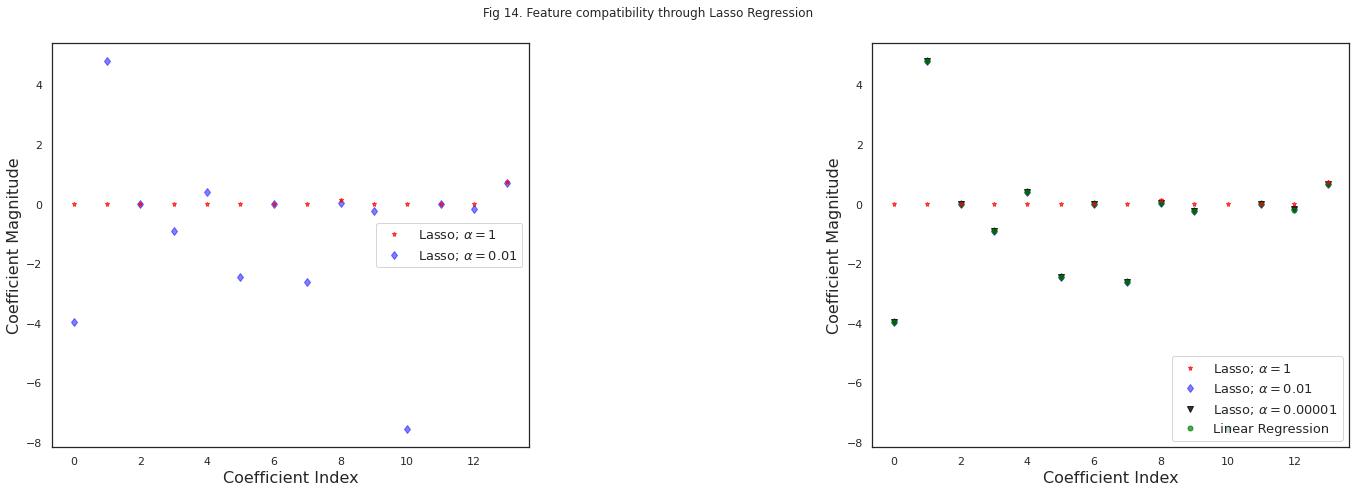

In [46]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)
plt.figure(figsize=(19, 7))
plt.subplot(1,2,1)
plt.title('Fig 14. Feature compatibility through Lasso Regression', x = 1.25, y = 1.05)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lassoAlpha.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=5)

plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) 
plt.plot(lassoAlpha.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lassoAlpha.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

### RIDGE REGRESSION

In [47]:
# Implementing Ridge Regression
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rrAlpha = Ridge(alpha = 100)
rrAlpha.fit(X_train, y_train)
Rtrain_score = lr.score(X_train, y_train)
Rtest_score = lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rrAlpha.score(X_train,y_train)
Ridge_test_score100 = rrAlpha.score(X_test, y_test)

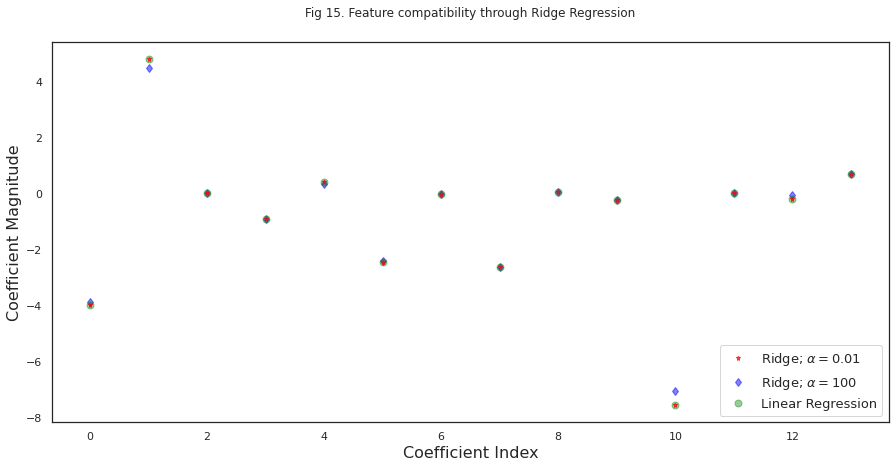

In [48]:
# Plotting results
plt.figure(figsize = (15, 7))
plt.title('Fig 15. Feature compatibility through Ridge Regression', y = 1.05)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rrAlpha.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

### UNDERSTANDING THE OUTPUT FOR LASSO AND RIDGE 

We have utilized two regularized regression approaches - Lasso and Ridge regression. They help with prevention of overfitting by helping suggest features to be used for prediction in our case. 

There are more regularized methods but we chose lasso and ridge regression because lasso does well if there are small numbers of significant parameters and others are close to zero whereas ridge works well if there are many large parameters of about the same value. So they both helped us take into account any potential edge case(s) that might exist. 

Lasso’s output suggests that column with index 1 i.e. danceability and column with index 13 are the most effective features to include while building our prediction model, and ridge’s output further verifies and suggests the same.



#### Key Performance Indicator(s)
It can be seen from the visualization that our guess regarding danceability and year features was correct in terms of getting a high coefficient magnitude in Lasso and Ridge Regression. 

Among the two features, we choose to use Danceability majorly because the feature year is categorical and pre-processing this feature would expand the feature space by 100, thus increasing the complexity of the training process. 



### Step 2
Prediction: The following prediction models are employed to compare the accuracy
1. Linear Regression
2. Random Forest Regression
3. XGBoost Regressor
4. Poly Regression

[Text(0.5, 1.0, 'Fig. 16: Filtering data over bias')]

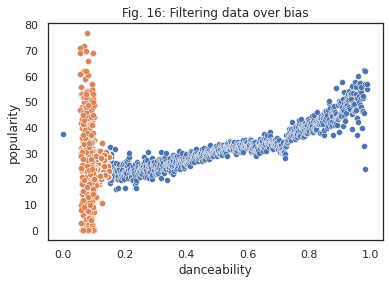

In [49]:
# Choosing Danceability as a feature to predict popularity since it shows linear trend as danceability varies (as derived in visualizations above)
dummy = train_data.copy()
grouped = train_data.groupby('danceability')
grouped = grouped.mean()['popularity']
sns.scatterplot(x = grouped.index, y=grouped)
dummy = pd.merge(dummy,
                  pd.DataFrame(grouped, columns=["popularity"]),
                  left_on='danceability',
                  right_index=True)
newD = dummy[dummy['danceability'].between(0, 0.15, inclusive=False)]
sns.scatterplot(x=newD.danceability, y=newD.popularity_y).set(title = 'Fig. 16: Filtering data over bias')

In [50]:
# Filtering the values of popularity based on danceability
def getPopularityFeatures(dataset, kIndicator):
  group = dataset.groupby(kIndicator)
  YFeat = group.mean()["popularity"]
  dataset = pd.merge(dataset,
                  pd.DataFrame(YFeat, columns=["popularity"]),
                  left_on=kIndicator,
                  right_index=True)
  filtered = dataset[dataset[kIndicator] > 0.1]
  return np.array(filtered[kIndicator]), np.array(filtered.popularity_y)

(118294,) (118294,)


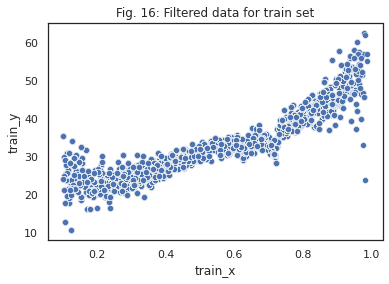

In [51]:
# Getting train test values by utilizing the function above
train_x, train_y = getPopularityFeatures(train_data, "danceability")
val_x, val_y = getPopularityFeatures(val_data, "danceability")
test_x, test_y = getPopularityFeatures(test_data, "danceability")

# Plotting train_x and train_y
sns.scatterplot(x=train_x, y=train_y).set(title = 'Fig. 16: Filtered data for train set', xlabel='train_x', ylabel='train_y')
print(train_x.shape, train_y.shape)

(16916,) (16916,)


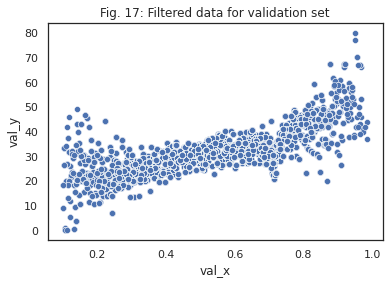

In [52]:
# Plotting for val_x and val_y
sns.scatterplot(x=val_x, y=val_y).set(title = 'Fig. 17: Filtered data for validation set', xlabel='val_x', ylabel='val_y')
print(val_x.shape, val_y.shape)

(33800,) (33800,)


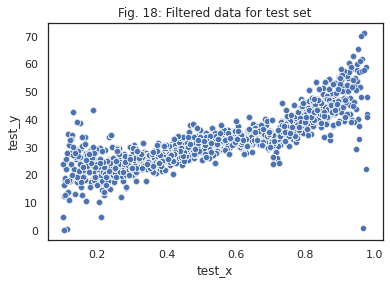

In [53]:
# Plotting for test_x and test_y
sns.scatterplot(x=test_x, y=test_y).set(title = 'Fig. 18: Filtered data for test set', xlabel='test_x', ylabel='test_y')
print(test_x.shape, test_y.shape)

In [54]:
# Implementing Linear Regression and Random Forest Regression
reg = LinearRegression().fit(train_x.reshape(-1,1), train_y.reshape(-1,1))
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(train_x.reshape(-1,1), train_y.reshape(-1,1))
y_pred_lreg = reg.predict(test_x.reshape(-1,1))
y_predictions = rf.predict(test_x.reshape(-1,1))
accuracyRF = rf.score(test_x.reshape(-1,1), test_y.reshape(-1,1))
accuracyLR = reg.score(test_x.reshape(-1,1), test_y.reshape(-1,1))
print("Random Forest Accuracy: ", accuracyRF)
print("Regression Score (Linear Regression): ", accuracyLR)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest Accuracy:  0.6526645242564224
Regression Score (Linear Regression):  0.6472560175563298


In [55]:
# Implementing XG Boost Regression
xreg = xgb.XGBRegressor(
    n_estimators=1000,
    reg_lambda=1,
    gamma=0,
    max_depth=2
)
xreg.fit(train_x.reshape(-1,1), train_y.reshape(-1,1))
y_pred_xgb = xreg.predict(test_x.reshape(-1,1))
accuracyXGB = xreg.score(test_x.reshape(-1,1), test_y.reshape(-1,1))
print("XGBoost Score: ", accuracyXGB)

[01:07:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Score:  0.706360999945278


In [56]:
# Implementing Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(train_x.reshape(-1,1))
X_poly_test = poly.fit_transform(test_x.reshape(-1,1))
poly = LinearRegression()
# print(X_poly.shape, train_x.shape, train_y.shape)
poly.fit(X_poly, train_y.reshape(-1,1))
y_pred_poly = poly.predict(X_poly_test)
accuracyP = poly.score(X_poly_test, test_y.reshape(-1,1))
print("Poly regression accuracy: ", accuracyP)

Poly regression accuracy:  0.6618894649980187


In [57]:
print(reg.get_params)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


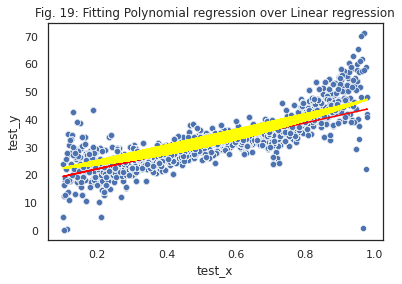

In [58]:
# Plotting and checking how linear regressing and polynomial regression fits
sns.scatterplot(x=test_x, y=test_y).set(title = 'Fig. 19: Fitting Polynomial regression over Linear regression', xlabel = 'test_x', ylabel = 'test_y')
plt.plot(test_x, y_pred_lreg, color='red')
plt.plot(test_x, y_pred_poly, color='yellow')

In [59]:
# Finding out Root Mean Square Error (RMSE) values for implemented regressors
print("RMSE (Test):")
rmseLR = mean_squared_error(test_y.reshape(-1,1), y_pred_lreg.reshape(-1,1))
rmseRF = mean_squared_error(test_y.reshape(-1,1), y_predictions.reshape(-1,1))
rmseXGB = mean_squared_error(test_y.reshape(-1,1), y_pred_xgb.reshape(-1,1))
rmsePR = mean_squared_error(test_y.reshape(-1,1), y_pred_poly.reshape(-1,1))
print("Linear Regressor: ", rmseLR)
print("Random Forest Regressor: ", rmseRF)
print("XGBoost Regressor: ", rmseXGB)
print("Polynomial Regressor: ", rmsePR)

RMSE (Test):
Linear Regressor:  13.68676408004425
Random Forest Regressor:  13.476909457672829
XGBoost Regressor:  11.393440904667651
Polynomial Regressor:  13.118973975094388


In [60]:
# Comparison table for accuracy and RMSE scores of different regressors used
results = pd.DataFrame([accuracyLR, accuracyRF, accuracyXGB, accuracyP]).T
results.columns = ['Linear Regression', 'Random Forest', 'XG Boost','Polynomial Regression']
new_row = {'Linear Regression': rmseLR, 'Random Forest':rmseRF, 'XG Boost':rmseXGB, 'Polynomial Regression':rmsePR}
results = results.append(new_row, ignore_index=True)
results.index = ['Accuracy: ', 'RMSE: '] # Renaming row
results.replace(np.nan, '-')

,Linear Regression,Random Forest,XG Boost,Polynomial Regression
Accuracy:,0.647256,0.652665,0.706361,0.661889
RMSE:,13.686764,13.476909,11.393441,13.118974


## Conclusion: 
Linear regressor gives good estimate. However, polynomial regressor gives a better fit.
Ensemble algorithms such as XG Boost and Random Forest are better than these two. XGBoost is the best.

In [61]:
# Function to generate predictions with given x_val
def getPrediction(x_val, model):
  if x_val < 0.1:
    return None
  predictions = pd.DataFrame()
  predictions["X Feature"], predictions["ground truth"] = test_x, test_y
  if model == "XGB":
    predictions["Popularity"] = y_pred_xgb
  if model == "RandomForest":
    predictions["Popularity"] = y_predictions
  if model == "Linear":
    predictions["Popularity"] =  y_pred_lreg
  if model == "Poly":
    predictions["Popularity"] = y_pred_poly
  return predictions[predictions["X Feature"] == x_val].mean()

In [62]:
# Printing generated predictions according to models
for model in ["XGB", "RandomForest", "Linear", "Poly"]:
  print("Model: {}\n{}\n".format(model, getPrediction(0.8, model))) # User input 0.8 (Danceability quotient)

Model: XGB
X Feature        0.800000
ground truth    43.175000
Popularity      40.748299
dtype: float64

Model: RandomForest
X Feature        0.800000
ground truth    43.175000
Popularity      38.773585
dtype: float64

Model: Linear
X Feature        0.800000
ground truth    43.175000
Popularity      38.791498
dtype: float64

Model: Poly
X Feature        0.80000
ground truth    43.17500
Popularity      39.69185
dtype: float64



# CLASSIFICATION BY GENRES

In [63]:
from sklearn import cluster
import os

In [64]:
# Make a copy of data for clustering
data_for_clustering = data_by_genres.copy()
print(data_for_clustering.columns)

Index(['genres', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')


In [65]:
# Drop inconsequential columns from the data frame
data_for_clustering.drop(columns=['genres','duration_ms','popularity'], inplace=True)
print(data_for_clustering)

      acousticness  danceability    energy  ...   valence  key  mode
0         0.494780      0.299333  0.450678  ...  0.221750    5     1
1         0.679245      0.521473  0.401522  ...  0.515920    7     1
2         0.621532      0.577017  0.345694  ...  0.453186   11     1
3         0.359395      0.459500  0.487000  ...  0.304990    1     1
4         0.353347      0.694400  0.613400  ...  0.634187   10     0
...            ...           ...       ...  ...       ...  ...   ...
2659      0.218600      0.560365  0.611985  ...  0.596705    9     1
2660      0.124000      0.834000  0.674000  ...  0.951000    7     0
2661      0.233181      0.752762  0.627238  ...  0.844381    4     1
2662      0.052700      0.776000  0.656000  ...  0.966000    4     1
2663      0.347767      0.596992  0.603610  ...  0.752643    7     1

[2664 rows x 11 columns]


In [66]:
# Copy data to cluster
data_to_cluster = data.copy()
print(data_to_cluster.columns)

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


In [67]:
# Drop columns from clustered data and re-order columns
data_to_cluster.drop(columns=['duration_ms','release_date','popularity','year','id','explicit'], inplace=True)
data_to_cluster = data_to_cluster[['name','artists','acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']]
print(data_to_cluster)

                                                 name  ... valence
0                         Singende Bataillone 1. Teil  ...  0.7790
1            Fantasiestücke, Op. 111: Più tosto lento  ...  0.0767
2                      Chapter 1.18 - Zamek kaniowski  ...  0.8800
3       Bebamos Juntos - Instrumental (Remasterizado)  ...  0.7200
4         Polonaise-Fantaisie in A-Flat Major, Op. 61  ...  0.0693
...                                               ...  ...     ...
169904                  Skechers (feat. Tyga) - Remix  ...  0.3060
169905                 Sweeter (feat. Terrace Martin)  ...  0.2700
169906                               How Would I Know  ...  0.1530
169907                                    I Found You  ...  0.4720
169908                          More Hearts Than Mine  ...  0.3660

[169909 rows x 13 columns]


In [68]:
# Separate cluster centers and data values
cluster_centers = data_for_clustering.iloc[:,:].values
data = data_to_cluster.iloc[:,:].values
print(cluster_centers.shape)
print(data.shape)

(2664, 11)
(169909, 13)


In [69]:
# Take the mean and standard deviation based on the cluster centers to standardize and normal data
for col in range(cluster_centers.shape[1]):
    mean = cluster_centers[:,col].mean()
    std = cluster_centers[:,col].std()
    cluster_centers[:,col] = (cluster_centers[:,col] - mean)/std
    data[:,2:] = (data[:,2:] - mean)/std    #mean and std of by_genre data is used in order to treat music as a whole 
    #if we normalized with respect to the 'data', it could have been biased, example: if the data contained a lot of pop, the preference would be towards pop


In [70]:
#not necessary to cluster, as genrewise cluster centers are known, now we have to calculate genrewise cluster index 
# Executing this cell takes a long time

# cluster_model = cluster.KMeans(n_clusters=cluster_centers.shape[0], random_state=2)
# predict = cluster_model.fit(data[:,2:])

In [72]:
# Fitting the data based on the cluster and spatial distance
cluster_column = np.zeros((data.shape[0], 1))
for i in range (data.shape[0]):
    dist = np.sum((cluster_centers - data[i,2:])**2,axis=1)
    percent_done = 100 * (i / data.shape[0])
    cluster_column[i] = np.argmax(dist)
    print("{} Percent Done | {} index (min)".format(percent_done, np.argmin(dist)))

data_with_cluster_labels = np.append(data,cluster_column,axis=1)
print(data_with_cluster_labels.shape)

data_to_cluster['clustered_into_genre'] = list(cluster_column)
print(data_to_cluster)
    

Streaming output truncated to the last 5000 lines.
97.06607654685743 Percent Done | 1179 index (min)
97.06666509719909 Percent Done | 316 index (min)
97.06725364754074 Percent Done | 609 index (min)
97.0678421978824 Percent Done | 962 index (min)
97.06843074822405 Percent Done | 1366 index (min)
97.0690192985657 Percent Done | 1366 index (min)
97.06960784890735 Percent Done | 1350 index (min)
97.07019639924901 Percent Done | 1366 index (min)
97.07078494959066 Percent Done | 481 index (min)
97.0713734999323 Percent Done | 1366 index (min)
97.07196205027398 Percent Done | 1366 index (min)
97.07255060061563 Percent Done | 616 index (min)
97.07313915095727 Percent Done | 962 index (min)
97.07372770129894 Percent Done | 316 index (min)
97.07431625164058 Percent Done | 1366 index (min)
97.07490480198224 Percent Done | 1366 index (min)
97.07549335232389 Percent Done | 609 index (min)
97.07608190266555 Percent Done | 962 index (min)
97.0766704530072 Percent Done | 1366 index (min)
97.077259003

In [73]:
cluster_column = data_to_cluster['clustered_into_genre']
data.shape[0]

169909

In [74]:
#APPROACH 1: SIMPLY SELECTING K NEAREST NEIGHBOURS OUT OF ALL 168592 SONGS

k = 5     #no. of recommendations


#TODO, use better strategy for song clustering
#TODO, deal with duplicates, or colliding names from different artists


song_index = -1
name_not_found = 0

name_list = list(data[:,0])
while(1):
    if(name_not_found == 0):
        print('Enter a song name:\n')
    name = str(input())
    if name in name_list:
        print('Song found, generating recommendations:\n')
        name_not_found = 0
        song_index = name_list.index(name)
    else:
        name_not_found = 1
        print('Please enter a valid song name:\n')
        continue
    dist = np.argsort(np.sum((data[:,2:] - data[song_index,2:])**2,axis=1))          #for calculating k-nearest neighbours
    print(dist.shape)
    for i in range(1,k+1):      #since the song itself will have minimum distance to itself
        index_in_data = list(dist).index(i)
        print("Recommendation ",i,":\n\t")
        print(data[index_in_data][0], " by", data[index_in_data][1],"\n")
    print("Do you want to type another song? (Y/N):\n")
    ans = str(input())
    if(ans=='N'):
        break
    else:
        continue

Enter a song name:

Bohemian Rhapsody
Song found, generating recommendations:

(169909,)
Recommendation  1 :
	
That's My Job  by ['Conway Twitty'] 

Recommendation  2 :
	
Salome, Op.54 / Scene 2: "Du wirst das für mich tun"  by ['Richard Strauss', 'Christel Goltz', 'Anton Dermota', 'Wiener Philharmoniker', 'Clemens Krauss'] 

Recommendation  3 :
	
Happy When It Rains  by ['The Jesus and Mary Chain'] 

Recommendation  4 :
	
Is You Is or Is You Ain't My Baby - 2002 Remaster  by ['Dinah Washington'] 

Recommendation  5 :
	
Dressed in Black  by ['Depeche Mode'] 

Do you want to type another song? (Y/N):

N


In [76]:
#APPROACH 2: RECOMMENDING SONGS ONLY OUT OF THE SAME CLUSTER


k = 5     #no. of recommendations


song_index = -1
name_not_found = 0

name_list = list(data[:,0])
while(1):
    if(name_not_found == 0):
        print('Enter a song name:\n')
    name = str(input())
    if name in name_list:
        print('Song found, generating recommendations:\n')
        name_not_found = 0
        song_index = name_list.index(name)
    else:
        name_not_found = 1
        print('Please enter a valid song name:\n')
        continue
    
    #returns a subarray of data with same genre, according to our clustering algoritm
    genre_ofinput = np.asarray([cluster_column[song_index]])
    relevant_songs = data[np.in1d(cluster_column, genre_ofinput)]
    
    dist = np.argsort(np.sum((relevant_songs[:,2:] - data[song_index,2:])**2,axis=1))          #for calculating k-nearest neighbours
    print(dist.shape)
    for i in range(1,k+1):      #since the song itself will have minimum distance to itself
        index_in_data = list(dist).index(i)
        print("Recommendation ",i,":\n\t")
        print(relevant_songs[index_in_data][0], " by", relevant_songs[index_in_data][1],"\n")
    print("Do you want to type another song? (Y/N):\n")
    ans = str(input())
    if(ans=='N'):
        break
    else:
        continue

Enter a song name:

Bohemian Rhapsody
Song found, generating recommendations:

(169766,)
Recommendation  1 :
	
Rosas Rojas  by ['Grupo Toppaz De Reynaldo Flores'] 

Recommendation  2 :
	
Quero Beijar-te as Mãos  by ['Cascatinha & Inhana'] 

Recommendation  3 :
	
Truck Drivin' Man - Demo Version  by ['Lynyrd Skynyrd'] 

Recommendation  4 :
	
Heart Attack American  by ['The Bronx'] 

Recommendation  5 :
	
I Wonder U  by ['Prince'] 

Do you want to type another song? (Y/N):

N


In [77]:
df = pd.read_csv(r'/content/drive/My Drive/Project Dataset/archive/data_by_artist.csv')
df2 = df.drop(['mode', 'count', 'artists'], axis = 1)
X = df2.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 100, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)

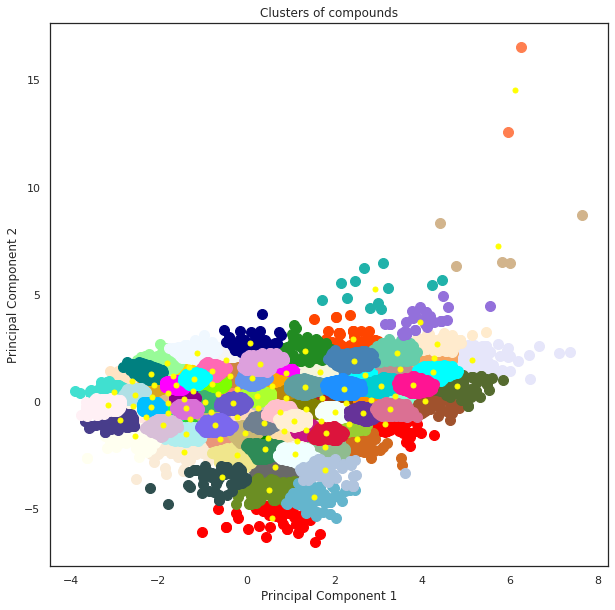

In [78]:
from matplotlib import colors as mcolors
plt.figure(figsize=(10,10))
plt.scatter(principalComponents1[y_kmeans == 0, 0], principalComponents1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(principalComponents1[y_kmeans == 1, 0], principalComponents1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(principalComponents1[y_kmeans == 2, 0], principalComponents1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(principalComponents1[y_kmeans == 3, 0], principalComponents1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(principalComponents1[y_kmeans == 4, 0], principalComponents1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(principalComponents1[y_kmeans == 5, 0], principalComponents1[y_kmeans == 5, 1], s = 100, c = 'limegreen', label = 'Cluster 6')
plt.scatter(principalComponents1[y_kmeans == 6, 0], principalComponents1[y_kmeans == 6, 1], s = 100, c = 'lavender', label = 'Cluster 7')
plt.scatter(principalComponents1[y_kmeans == 7, 0], principalComponents1[y_kmeans == 7, 1], s = 100, c = 'black', label = 'Cluster 8')
plt.scatter(principalComponents1[y_kmeans == 8, 0], principalComponents1[y_kmeans == 8, 1], s = 100, c = 'dimgray', label = 'Cluster 9')
plt.scatter(principalComponents1[y_kmeans == 9, 0], principalComponents1[y_kmeans == 9, 1], s = 100, c = 'silver', label = 'Cluster 10')
plt.scatter(principalComponents1[y_kmeans == 10, 0], principalComponents1[y_kmeans == 10, 1], s = 100, c = 'gainsboro', label = 'Cluster 11')
plt.scatter(principalComponents1[y_kmeans == 11, 0], principalComponents1[y_kmeans == 11, 1], s = 100, c = 'white', label = 'Cluster 12')
plt.scatter(principalComponents1[y_kmeans == 12, 0], principalComponents1[y_kmeans == 12, 1], s = 100, c = 'whitesmoke', label = 'Cluster 13')
plt.scatter(principalComponents1[y_kmeans == 13, 0], principalComponents1[y_kmeans == 13, 1], s = 100, c = 'rosybrown', label = 'Cluster 14')
plt.scatter(principalComponents1[y_kmeans == 14, 0], principalComponents1[y_kmeans == 14, 1], s = 100, c = 'indianred', label = 'Cluster 15')
plt.scatter(principalComponents1[y_kmeans == 15, 0], principalComponents1[y_kmeans == 15, 1], s = 100, c = 'firebrick', label = 'Cluster 16')
plt.scatter(principalComponents1[y_kmeans == 16, 0], principalComponents1[y_kmeans == 16, 1], s = 100, c = 'red', label = 'Cluster 17')
plt.scatter(principalComponents1[y_kmeans == 17, 0], principalComponents1[y_kmeans == 17, 1], s = 100, c = 'mistyrose', label = 'Cluster 18')
plt.scatter(principalComponents1[y_kmeans == 18, 0], principalComponents1[y_kmeans == 18, 1], s = 100, c = 'salmon', label = 'Cluster 19')
plt.scatter(principalComponents1[y_kmeans == 19, 0], principalComponents1[y_kmeans == 19, 1], s = 100, c = 'darksalmon', label = 'Cluster 20')
plt.scatter(principalComponents1[y_kmeans == 20, 0], principalComponents1[y_kmeans == 20, 1], s = 100, c = 'coral', label = 'Cluster 21')
plt.scatter(principalComponents1[y_kmeans == 21, 0], principalComponents1[y_kmeans == 21, 1], s = 100, c = 'orangered', label = 'Cluster 22')
plt.scatter(principalComponents1[y_kmeans == 22, 0], principalComponents1[y_kmeans == 22, 1], s = 100, c = 'sienna', label = 'Cluster 23')
plt.scatter(principalComponents1[y_kmeans == 23, 0], principalComponents1[y_kmeans == 23, 1], s = 100, c = 'seashell', label = 'Cluster 24')
plt.scatter(principalComponents1[y_kmeans == 24, 0], principalComponents1[y_kmeans == 24, 1], s = 100, c = 'chocolate', label = 'Cluster 25')
plt.scatter(principalComponents1[y_kmeans == 25, 0], principalComponents1[y_kmeans == 25, 1], s = 100, c = 'saddlebrown', label = 'Cluster 26')
plt.scatter(principalComponents1[y_kmeans == 26, 0], principalComponents1[y_kmeans == 26, 1], s = 100, c = 'sandybrown', label = 'Cluster 27')
plt.scatter(principalComponents1[y_kmeans == 27, 0], principalComponents1[y_kmeans == 27, 1], s = 100, c = 'peachpuff', label = 'Cluster 28')
plt.scatter(principalComponents1[y_kmeans == 28, 0], principalComponents1[y_kmeans == 28, 1], s = 100, c = 'peru', label = 'Cluster 29')
plt.scatter(principalComponents1[y_kmeans == 29, 0], principalComponents1[y_kmeans == 29, 1], s = 100, c = 'bisque', label = 'Cluster 30')
plt.scatter(principalComponents1[y_kmeans == 30, 0], principalComponents1[y_kmeans == 30, 1], s = 100, c = 'linen', label = 'Cluster 31')
plt.scatter(principalComponents1[y_kmeans == 31, 0], principalComponents1[y_kmeans == 31, 1], s = 100, c = 'darkorange', label = 'Cluster 32')
plt.scatter(principalComponents1[y_kmeans == 32, 0], principalComponents1[y_kmeans == 32, 1], s = 100, c = 'burlywood', label = 'Cluster 33')
plt.scatter(principalComponents1[y_kmeans == 33, 0], principalComponents1[y_kmeans == 33, 1], s = 100, c = 'antiquewhite', label = 'Cluster 34')
plt.scatter(principalComponents1[y_kmeans == 34, 0], principalComponents1[y_kmeans == 34, 1], s = 100, c = 'tan', label = 'Cluster 35')
plt.scatter(principalComponents1[y_kmeans == 35, 0], principalComponents1[y_kmeans == 35, 1], s = 100, c = 'navajowhite', label = 'Cluster 36')
plt.scatter(principalComponents1[y_kmeans == 36, 0], principalComponents1[y_kmeans == 36, 1], s = 100, c = 'orange', label = 'Cluster 37')
plt.scatter(principalComponents1[y_kmeans == 37, 0], principalComponents1[y_kmeans == 37, 1], s = 100, c = 'oldlace', label = 'Cluster 38')
plt.scatter(principalComponents1[y_kmeans == 38, 0], principalComponents1[y_kmeans == 38, 1], s = 100, c = 'darkgoldenrod', label = 'Cluster 39')
plt.scatter(principalComponents1[y_kmeans == 39, 0], principalComponents1[y_kmeans == 39, 1], s = 100, c = 'goldenrod', label = 'Cluster 40')
plt.scatter(principalComponents1[y_kmeans == 40, 0], principalComponents1[y_kmeans == 40, 1], s = 100, c = 'gold', label = 'Cluster 41')
plt.scatter(principalComponents1[y_kmeans == 41, 0], principalComponents1[y_kmeans == 41, 1], s = 100, c = 'khaki', label = 'Cluster 42')
plt.scatter(principalComponents1[y_kmeans == 42, 0], principalComponents1[y_kmeans == 42, 1], s = 100, c = 'darkkhaki', label = 'Cluster 43')
plt.scatter(principalComponents1[y_kmeans == 43, 0], principalComponents1[y_kmeans == 43, 1], s = 100, c = 'ivory', label = 'Cluster 44')
plt.scatter(principalComponents1[y_kmeans == 44, 0], principalComponents1[y_kmeans == 44, 1], s = 100, c = 'beige', label = 'Cluster 45')
plt.scatter(principalComponents1[y_kmeans == 45, 0], principalComponents1[y_kmeans == 45, 1], s = 100, c = 'olive', label = 'Cluster 46')
plt.scatter(principalComponents1[y_kmeans == 46, 0], principalComponents1[y_kmeans == 46, 1], s = 100, c = 'y', label = 'Cluster 47')
plt.scatter(principalComponents1[y_kmeans == 47, 0], principalComponents1[y_kmeans == 47, 1], s = 100, c = 'olivedrab', label = 'Cluster 48')
plt.scatter(principalComponents1[y_kmeans == 48, 0], principalComponents1[y_kmeans == 48, 1], s = 100, c = 'yellowgreen', label = 'Cluster 49')
plt.scatter(principalComponents1[y_kmeans == 49, 0], principalComponents1[y_kmeans == 49, 1], s = 100, c = 'darkolivegreen', label = 'Cluster 50')
plt.scatter(principalComponents1[y_kmeans == 50, 0], principalComponents1[y_kmeans == 50, 1], s = 100, c = 'greenyellow', label = 'Cluster 51')
plt.scatter(principalComponents1[y_kmeans == 51, 0], principalComponents1[y_kmeans == 51, 1], s = 100, c = 'chartreuse', label = 'Cluster 52')
plt.scatter(principalComponents1[y_kmeans == 52, 0], principalComponents1[y_kmeans == 52, 1], s = 100, c = 'blanchedalmond', label = 'Cluster 53')
plt.scatter(principalComponents1[y_kmeans == 53, 0], principalComponents1[y_kmeans == 53, 1], s = 100, c = 'darkseagreen', label = 'Cluster 54')
plt.scatter(principalComponents1[y_kmeans == 54, 0], principalComponents1[y_kmeans == 54, 1], s = 100, c = 'palegreen', label = 'Cluster 55')
plt.scatter(principalComponents1[y_kmeans == 55, 0], principalComponents1[y_kmeans == 55, 1], s = 100, c = 'forestgreen', label = 'Cluster 56')
plt.scatter(principalComponents1[y_kmeans == 56, 0], principalComponents1[y_kmeans == 56, 1], s = 100, c = 'seagreen', label = 'Cluster 57')
plt.scatter(principalComponents1[y_kmeans == 57, 0], principalComponents1[y_kmeans == 57, 1], s = 100, c = 'mediumseagreen', label = 'Cluster 58')
plt.scatter(principalComponents1[y_kmeans == 58, 0], principalComponents1[y_kmeans == 58, 1], s = 100, c = 'springgreen', label = 'Cluster 59')
plt.scatter(principalComponents1[y_kmeans == 59, 0], principalComponents1[y_kmeans == 59, 1], s = 100, c = 'mintcream', label = 'Cluster 60')
plt.scatter(principalComponents1[y_kmeans == 60, 0], principalComponents1[y_kmeans == 60, 1], s = 100, c = 'mediumaquamarine', label = 'Cluster 61')
plt.scatter(principalComponents1[y_kmeans == 61, 0], principalComponents1[y_kmeans == 61, 1], s = 100, c = 'aquamarine', label = 'Cluster 62')
plt.scatter(principalComponents1[y_kmeans == 62, 0], principalComponents1[y_kmeans == 62, 1], s = 100, c = 'turquoise', label = 'Cluster 63')
plt.scatter(principalComponents1[y_kmeans == 63, 0], principalComponents1[y_kmeans == 63, 1], s = 100, c = 'lightseagreen', label = 'Cluster 64')
plt.scatter(principalComponents1[y_kmeans == 64, 0], principalComponents1[y_kmeans == 64, 1], s = 100, c = 'azure', label = 'Cluster 65')
plt.scatter(principalComponents1[y_kmeans == 65, 0], principalComponents1[y_kmeans == 65, 1], s = 100, c = 'paleturquoise', label = 'Cluster 66')
plt.scatter(principalComponents1[y_kmeans == 66, 0], principalComponents1[y_kmeans == 66, 1], s = 100, c = 'darkslategray', label = 'Cluster 67')
plt.scatter(principalComponents1[y_kmeans == 67, 0], principalComponents1[y_kmeans == 67, 1], s = 100, c = 'teal', label = 'Cluster 68')
plt.scatter(principalComponents1[y_kmeans == 68, 0], principalComponents1[y_kmeans == 68, 1], s = 100, c = 'c', label = 'Cluster 69')
plt.scatter(principalComponents1[y_kmeans == 69, 0], principalComponents1[y_kmeans == 69, 1], s = 100, c = 'cyan', label = 'Cluster 70')
plt.scatter(principalComponents1[y_kmeans == 70, 0], principalComponents1[y_kmeans == 70, 1], s = 100, c = 'darkturquoise', label = 'Cluster 71')
plt.scatter(principalComponents1[y_kmeans == 71, 0], principalComponents1[y_kmeans == 71, 1], s = 100, c = 'cadetblue', label = 'Cluster 72')
plt.scatter(principalComponents1[y_kmeans == 72, 0], principalComponents1[y_kmeans == 72, 1], s = 100, c = 'powderblue', label = 'Cluster 73')
plt.scatter(principalComponents1[y_kmeans == 73, 0], principalComponents1[y_kmeans == 73, 1], s = 100, c = 'deepskyblue', label = 'Cluster 74')
plt.scatter(principalComponents1[y_kmeans == 74, 0], principalComponents1[y_kmeans == 74, 1], s = 100, c = 'steelblue', label = 'Cluster 75')
plt.scatter(principalComponents1[y_kmeans == 75, 0], principalComponents1[y_kmeans == 75, 1], s = 100, c = 'aliceblue', label = 'Cluster 76')
plt.scatter(principalComponents1[y_kmeans == 76, 0], principalComponents1[y_kmeans == 76, 1], s = 100, c = 'dodgerblue', label = 'Cluster 77')
plt.scatter(principalComponents1[y_kmeans == 77, 0], principalComponents1[y_kmeans == 77, 1], s = 100, c = 'slategrey', label = 'Cluster 78')
plt.scatter(principalComponents1[y_kmeans == 78, 0], principalComponents1[y_kmeans == 78, 1], s = 100, c = 'lightsteelblue', label = 'Cluster 79')
plt.scatter(principalComponents1[y_kmeans == 79, 0], principalComponents1[y_kmeans == 79, 1], s = 100, c = 'cornflowerblue', label = 'Cluster 80')
plt.scatter(principalComponents1[y_kmeans == 80, 0], principalComponents1[y_kmeans == 80, 1], s = 100, c = 'navy', label = 'Cluster 81')
plt.scatter(principalComponents1[y_kmeans == 81, 0], principalComponents1[y_kmeans == 81, 1], s = 100, c = 'slateblue', label = 'Cluster 82')
plt.scatter(principalComponents1[y_kmeans == 82, 0], principalComponents1[y_kmeans == 82, 1], s = 100, c = 'darkslateblue', label = 'Cluster 83')
plt.scatter(principalComponents1[y_kmeans == 83, 0], principalComponents1[y_kmeans == 83, 1], s = 100, c = 'mediumslateblue', label = 'Cluster 84')
plt.scatter(principalComponents1[y_kmeans == 84, 0], principalComponents1[y_kmeans == 84, 1], s = 100, c = 'mediumpurple', label = 'Cluster 85')
plt.scatter(principalComponents1[y_kmeans == 85, 0], principalComponents1[y_kmeans == 85, 1], s = 100, c = 'rebeccapurple', label = 'Cluster 86')
plt.scatter(principalComponents1[y_kmeans == 86, 0], principalComponents1[y_kmeans == 86, 1], s = 100, c = 'thistle', label = 'Cluster 87')
plt.scatter(principalComponents1[y_kmeans == 87, 0], principalComponents1[y_kmeans == 87, 1], s = 100, c = 'plum', label = 'Cluster 88')
plt.scatter(principalComponents1[y_kmeans == 88, 0], principalComponents1[y_kmeans == 88, 1], s = 100, c = 'darkmagenta', label = 'Cluster 89')
plt.scatter(principalComponents1[y_kmeans == 89, 0], principalComponents1[y_kmeans == 89, 1], s = 100, c = 'magenta', label = 'Cluster 90')
plt.scatter(principalComponents1[y_kmeans == 90, 0], principalComponents1[y_kmeans == 90, 1], s = 100, c = 'orchid', label = 'Cluster 91')
plt.scatter(principalComponents1[y_kmeans == 91, 0], principalComponents1[y_kmeans == 91, 1], s = 100, c = 'mediumvioletred', label = 'Cluster 92')
plt.scatter(principalComponents1[y_kmeans == 92, 0], principalComponents1[y_kmeans == 92, 1], s = 100, c = 'deeppink', label = 'Cluster 93')
plt.scatter(principalComponents1[y_kmeans == 93, 0], principalComponents1[y_kmeans == 93, 1], s = 100, c = 'hotpink', label = 'Cluster 94')
plt.scatter(principalComponents1[y_kmeans == 94, 0], principalComponents1[y_kmeans == 94, 1], s = 100, c = 'lavenderblush', label = 'Cluster 95')
plt.scatter(principalComponents1[y_kmeans == 95, 0], principalComponents1[y_kmeans == 95, 1], s = 100, c = 'pink', label = 'Cluster 96')
plt.scatter(principalComponents1[y_kmeans == 96, 0], principalComponents1[y_kmeans == 96, 1], s = 100, c = 'crimson', label = 'Cluster 97')
plt.scatter(principalComponents1[y_kmeans == 97, 0], principalComponents1[y_kmeans == 97, 1], s = 100, c = 'palevioletred', label = 'Cluster 98')
plt.scatter(principalComponents1[y_kmeans == 98, 0], principalComponents1[y_kmeans == 98, 1], s = 100, c = 'papayawhip', label = 'Cluster 99')
plt.scatter(principalComponents1[y_kmeans == 99, 0], principalComponents1[y_kmeans == 99, 1], s = 100, c = 'aqua', label = 'Cluster 100')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')
plt.title('Clusters of compounds')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.legend()
plt.show()